# **Proyecto 4 - Deep Learning - MÁSTER EN DATA SCIENCE & AI : NUCLIO** 


## Actividad 1: Deep Vision

Diseñar y comparar dos estrategias para la clasificación de imágenes en el dataset CIFAR100 de Keras (https://keras.io/api/datasets/cifar100/)

### **Estrategia 1: Red pre-entrenada**

La primera estrategia a comparar debe incluir la utilización de redes preentrenadas con el dataset ImageNet, llevando a cabo tareas de *transfer learning* y *fine-tuning* para clasificar los objetos de CIFAR100. Deben compararse al menos dos tipos de arquitecturas (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet...) y se debe seleccionar la que mayor precisión nos dé (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera que el ejercicio presente una profunda experimentación haciendo uso todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (weight regularization, dropout, batch normalization, data augmentation, etc.).

### **Estrategia 2: Entrenar desde cero o from scratch**

La segunda estrategia a comparar será una red neuronal que se debe diseñar, entrenar y optimizar. Se requiere una justificación empírica de las decisiones que llevaron a la selección de atributos, capas e hiperparámetros a los que se ha llegado. Se espera que el ejercicio presente una profunda experimentación haciendo uso de todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (weight regularization, dropout, batch normalization, data augmentation...).

## Normas a seguir

- Se debe entregar un **ÚNICO GOOGLE COLAB notebook** (archivo .ipynb) que incluya las instrucciones presentes y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso seguido (carga de datos, visualización de datos, proceso de entrenamiento y proceso de validación del modelo).
- Poner el nombre del grupo en el nombre del archivo y el nombre de todos los integrantes del grupo al inicio del notebook.
- Las redes utilizadas deben estar entrenadas y con las métricas extraídas en el conjunto de test.
- Es recomendable crear una última sección de texto en el notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterio de evaluación

- Seguimiento de las normas establecidas en la actividad.
- Efectividad al presentar las comparaciones entre métricas de evaluación de ambos modelos.
- Demostración de la utilización de técnicas de optimización para mejorar el rendimiento de los modelos.
- Modelos predictivos con rendimiento superior al aleatorio.
- Corrección en el uso de algoritmos, modelos y formas idiomáticas en Python.
- El código debe poder ejecutarse sin modificación alguna en Google Colaboratory.

Recomendaciones en el Uso de Colab:

- Eliminar las variables innecesarias para liberar RAM mediante la sentencia:

## GOOGLE DRIVE

In [ ]:
# SOLO PARA USO EN GOOGLE COLABORATORY
# Para conectar el notebook con la cuenta de gdrive
from google.colab import drive
drive.mount('/content/drive/')

BASE_FOLDER = '/content/drive/MyDrive/Nuclio/fco/' # Ajustar el directorio raíz de Google Drive

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## LIBRERIAS

Importamos diversas librerías necesarias para la manipulación de datos, creación de gráficos, y construcción de redes neuronales.

In [ ]:
# Import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from datetime import datetime
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, UpSampling2D, Dropout,BatchNormalization,GlobalAveragePooling2D
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

## DATA LOADING

Cargamos el dataset CIFAR-100, que incluye imágenes de 32x32 pixeles en 100 clases diferentes.
Al trabajar con modelos de clasificación de imágenes, es fundamental cargar los datos y dividirlos en entrenamiento y prueba.

In [ ]:
from tensorflow.keras.datasets import cifar100
# Carga de datos
print("[INFO]: Loading CIFAR-100 data...")
((X_train, Y_train), (X_test, Y_test)) = cifar100.load_data()

# CIFAR100 labelnames
labelNames = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']


[INFO]: Loading CIFAR-100 data...


## DATA UNDERSTANDING

Visualizamos las dimensiones de los datos y algunas imágenes de muestra del conjunto de entrenamiento.

Entender las dimensiones de entrada y salida nos ayuda a verificar que el modelo esté configurado correctamente. Visualizar ejemplos de los datos facilita identificar la variabilidad y complejidad visual que el modelo debe aprender.

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
print(x_train[0])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [195 205 193]
  [212 224 204]
  [182 194 167]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [170 176 150]
  [161 168 130]
  [146 154 113]]

 [[255 255 255]
  [254 254 254]
  [255 255 255]
  ...
  [189 199 169]
  [166 178 130]
  [121 133  87]]

 ...

 [[148 185  79]
  [142 182  57]
  [140 179  60]
  ...
  [ 30  17   1]
  [ 65  62  15]
  [ 76  77  20]]

 [[122 157  66]
  [120 155  58]
  [126 160  71]
  ...
  [ 22  16   3]
  [ 97 112  56]
  [141 161  87]]

 [[ 87 122  41]
  [ 88 122  39]
  [101 134  56]
  ...
  [ 34  36  10]
  [105 133  59]
  [138 173  79]]]


In [ ]:
print(y_train[0])

[19]


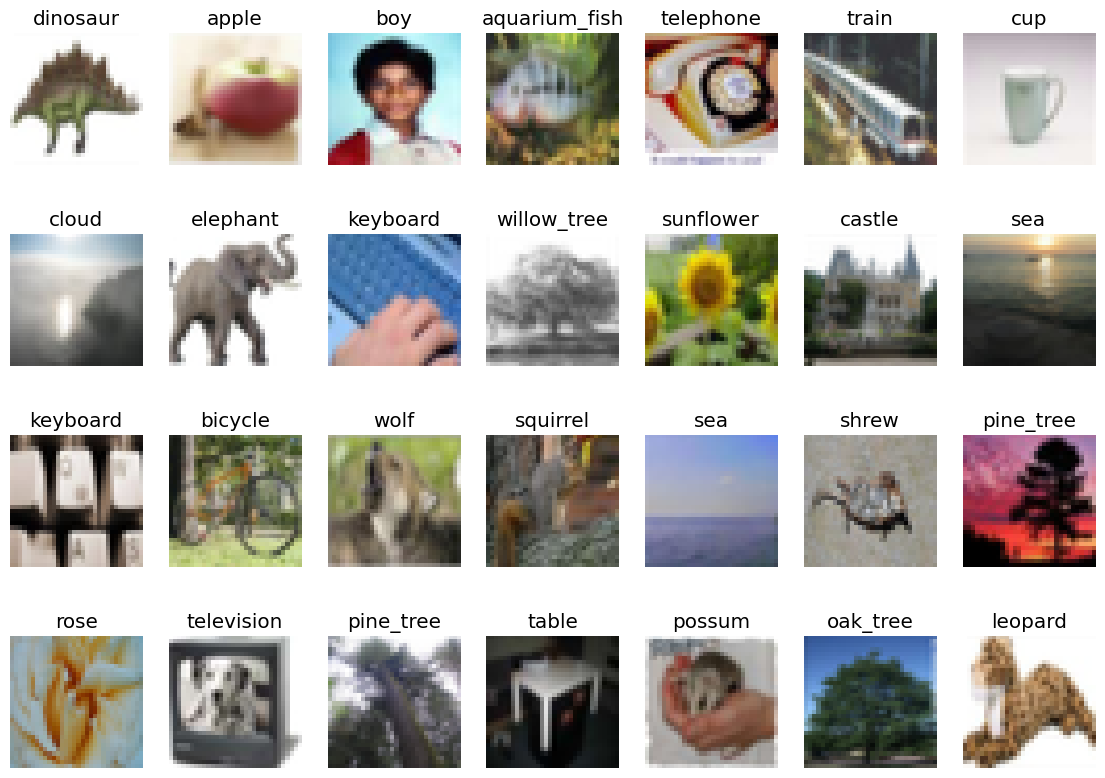

In [ ]:
fig = plt.figure(figsize=(14,10))
for n in range(1, 29):
    fig.add_subplot(4, 7, n)
    img = x_train[n]
    plt.imshow(img)
    plt.title(labelNames[y_train[n][0]])
    plt.axis('off')

## DATA PREPARATION

Dividimos los datos en conjuntos de entrenamiento, validación y prueba, y aplicamos One-Hot Encoding.

La división asegura que el modelo sea evaluado en datos no vistos, evitando el sobreajuste.

El One-Hot Encoding convierte las etiquetas a una forma adecuada para el entrenamiento de redes neuronales.

### Train/Test/Val split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.2)

In [ ]:
y_train = to_categorical(y_train, num_classes = 100)
y_val = to_categorical(y_val, num_classes = 100)
y_test = to_categorical(Y_test, num_classes = 100)

Normalización de los datos

Dividimos por 255 para escalar los valores de los píxeles de un rango de 0 a 255 a un rango de 0 a 1. Esto facilita el entrenamiento de modelos de machine learning, especialmente para redes neuronales, que funcionan mejor con valores más pequeños y dentro de un rango uniforme.

In [ ]:
x_train = x_train / 255
x_val = x_val / 255
x_test = X_test / 255

In [ ]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3)
(40000, 100) (10000, 100)


### Data augmentation

Aplicamos técnicas de aumentación para generar variaciones de las imágenes en el conjunto de entrenamiento.

La aumentación aumenta la variabilidad de los datos, previniendo el sobreajuste al exponer al modelo a versiones ligeramente diferentes de las imágenes originales.

In [ ]:
train_datagen = ImageDataGenerator(
        rotation_range = 10,
        zoom_range = 0.1,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        shear_range = 0.1,
        horizontal_flip = True,
        vertical_flip = False
        )
train_datagen.fit(x_train)

## ResNet50

Las redes ResNet son muy eficientes en transfer learning debido a su estructura de conexiones residuales, que permite a la red aprender características más complejas sin problemas de degradación.

Usamos la aqrquitectura ResNet50 preentrenada con ImageNet como base, y congelamos las capas menos las de BatchNormalization.

Congelar capas acelera el entrenamiento y retiene el conocimiento aprendido en ImageNet, mientras que BatchNormalization ajusta las distribuciones de salida para estabilizar el aprendizaje.

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(
    include_top = False,
    weights = 'imagenet',
    input_shape = (224,224,3)
)

# Congelar capas excepto BatchNormalization
for layer in base_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 53,120 (207.50 KB)

 Non-trainable params: 23,534,592 (89.78 MB)

In [ ]:
model = tf.keras.models.Sequential()

model.add(UpSampling2D(size=(7, 7),interpolation='bilinear')) # aumenta la resolución de las imágenes de entrada, porque las imagenes de CIFAR-100 son 32x32 y ResNet requieren entradas de tamaño 224x224
model.add(base_model)
model.add(GlobalAveragePooling2D())                           # ayuda a reducir el número de parámetros
model.add(Dropout(.25))                                       # desactiva aleatoriamente el 25% de las neuronas
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())                               # normaliza las salidas de la capa anterior
model.add(Dense(100, activation='softmax'))                   # softmax por ser una clasificacion multiclase


# Compilar el modelo
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy']) # Funcion de perdidas categorical_crossentropy por clasificacion multiclase con OHE


In [ ]:
# mejorar la eficiencia y precisión del entrenamiento
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
ResNet = model.fit(
    train_datagen.flow(x_train, y_train, batch_size=128),
    validation_data=(x_val, y_val),
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)

# Guardar el modelo en formato .h5
model.save(BASE_FOLDER+"ResNet50_CIFAR100.h5")

[INFO]: Entrenando la red...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 193s 527ms/step - accuracy: 0.0480 - loss: 4.6550 - val_accuracy: 0.0099 - val_loss: 9.0802 - learning_rate: 0.0010
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 150s 479ms/step - accuracy: 0.2383 - loss: 3.2134 - val_accuracy: 0.0149 - val_loss: 6.4977 - learning_rate: 0.0010
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 151s 479ms/step - accuracy: 0.3391 - loss: 2.6666 - val_accuracy: 0.2478 - val_loss: 3.1254 - learning_rate: 0.0010
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 151s 479ms/step - accuracy: 0.4071 - loss: 2.3224 - val_accuracy: 0.4855 - val_loss: 2.0039 - learning_rate: 0.0010
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 151s 480ms/step - accuracy: 0.4506 - loss: 2.1238 - val_accuracy: 0.5154 - val_loss: 1.8430 - learning_rate: 0.0010
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 151s 479ms/step - accuracy: 0.4887 - loss: 1.9529 - val_accuracy: 0.5362 - val_loss: 1.7438 - learning_rate: 0.0010
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 151s 479ms/step - accuracy: 0.5106 

[INFO]: Evaluando el modelo...
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 203ms/step
               precision    recall  f1-score   support

        apple       0.92      0.80      0.86       100
aquarium_fish       0.89      0.78      0.83       100
         baby       0.59      0.64      0.62       100
         bear       0.64      0.47      0.54       100
       beaver       0.55      0.55      0.55       100
          bed       0.77      0.81      0.79       100
          bee       0.82      0.70      0.76       100
       beetle       0.67      0.82      0.74       100
      bicycle       0.74      0.91      0.82       100
       bottle       0.95      0.86      0.90       100
         bowl       0.73      0.49      0.59       100
          boy       0.45      0.50      0.47       100
       bridge       0.73      0.81      0.77       100
          bus       0.70      0.77      0.73       100
    butterfly       0.50      0.84      0.63       100
        camel       0.76      0.74      0.75  

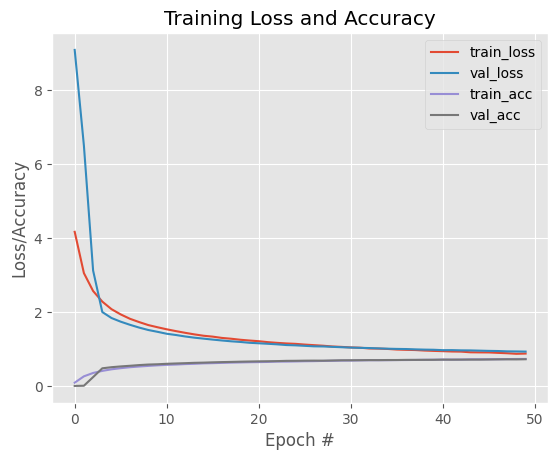

In [ ]:
# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model.predict(X_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), ResNet.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), ResNet.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), ResNet.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), ResNet.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [ ]:
del model, predictions, ResNet, base_model

## DenseNet121

El modelo DenseNet121 se emplea para la clasificación de imágenes del dataset CIFAR-100, utilizando una arquitectura de red densa.

Este modelo fue preentrenado en ImageNet y adaptado para el tamaño de las imágenes de CIFAR-100 (32x32) mediante una capa de UpSampling2D que incrementa la resolución de entrada a 224x224.

Se congela la mayoría de las capas excepto BatchNormalization para mantener las características aprendidas en ImageNet y permitir ajustes de normalización.

In [ ]:
from tensorflow.keras.applications import DenseNet121

base_model = DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)

# Congelar capas excepto BatchNormalization
for layer in base_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

base_model.summary()

Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_2          │ (None, 230, 230, 3)    │              0 │ input_layer_14[0][0]   │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d_2[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_3          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_3[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 83,648 (326.75 KB)

 Non-trainable params: 6,953,856 (26.53 MB)

#### Capas adicionales del modelo:

GlobalAveragePooling2D: Reduce la dimensionalidad y el número de parámetros, evitando así el sobreajuste.

Dense y Dropout: La capa densa con 256 neuronas y activación relu permite una clasificación efectiva, mientras que el Dropout del 50% ayuda a reducir el riesgo de sobreajuste.

Dense final: Utiliza una activación softmax con 100 unidades para las clases del dataset CIFAR-100.

El modelo se compila con Adam como optimizador, una tasa de aprendizaje de 0.001 y categorical_crossentropy como función de pérdida, adecuada para problemas de clasificación multiclase.

In [ ]:
model = tf.keras.models.Sequential()

model.add(UpSampling2D(size=(7, 7), interpolation='bilinear'))  # aumenta la resolución de las imágenes de entrada de 32x32 a 128x128
model.add(base_model)
model.add(GlobalAveragePooling2D())                             # ayuda a reducir el número de parámetros
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))                                         # desactiva aleatoriamente el 50% de las neuronas
model.add(Dense(100, activation='softmax'))                     # softmax por ser una clasificacion multiclase

# Compilación del modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

En el entrenamiento configuramos EarlyStopping y ReduceLROnPlateau para detener el entrenamiento si no hay mejoras en la pérdida de validación y para reducir la tasa de aprendizaje, lo cual estabiliza y acelera la convergencia del modelo.

In [ ]:
# mejorar la eficiencia y precisión del entrenamiento
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

# Entrenamiento de la red
print("[INFO]: Entrenando la red con DenseNet...")
DenseNet = model.fit(
    train_datagen.flow(x_train, y_train, batch_size=32),
    validation_data=(x_val, y_val),
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)

# Guardar el modelo
model.save(BASE_FOLDER+"DenseNet121_CIFAR100.h5")

[INFO]: Entrenando la red con DenseNet...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 297s 127ms/step - accuracy: 0.1617 - loss: 3.5856 - val_accuracy: 0.5153 - val_loss: 1.7324 - learning_rate: 0.0010
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 144s 115ms/step - accuracy: 0.4724 - loss: 1.8737 - val_accuracy: 0.6406 - val_loss: 1.2114 - learning_rate: 0.0010
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 144s 115ms/step - accuracy: 0.5255 - loss: 1.6398 - val_accuracy: 0.6458 - val_loss: 1.2277 - learning_rate: 0.0010
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 144s 115ms/step - accuracy: 0.5613 - loss: 1.5400 - val_accuracy: 0.6616 - val_loss: 1.1791 - learning_rate: 0.0010
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 115ms/step - accuracy: 0.5774 - loss: 1.4636 - val_accuracy: 0.6701 - val_loss: 1.1249 - learning_rate: 0.0010
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 144s 115ms/step - accuracy: 0.5899 - loss: 1.4147 - val_accuracy: 0.6825 - val_loss: 1.0882 - learning_rate: 0.0010
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 144s 115ms/step - acc

[INFO]: Evaluando el modelo...
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 58ms/step
               precision    recall  f1-score   support

        apple       0.94      0.89      0.91       100
aquarium_fish       0.91      0.86      0.88       100
         baby       0.67      0.66      0.66       100
         bear       0.73      0.63      0.68       100
       beaver       0.56      0.53      0.55       100
          bed       0.76      0.79      0.77       100
          bee       0.96      0.74      0.84       100
       beetle       0.75      0.83      0.79       100
      bicycle       0.94      0.92      0.93       100
       bottle       0.93      0.89      0.91       100
         bowl       0.67      0.64      0.65       100
          boy       0.55      0.52      0.54       100
       bridge       0.84      0.89      0.86       100
          bus       0.82      0.75      0.78       100
    butterfly       0.66      0.89      0.76       100
        camel       0.80      0.82      0.81 

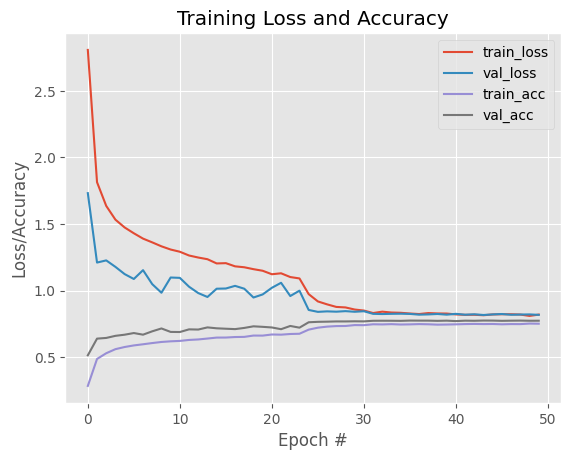

In [ ]:
# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
predictions = model.predict(X_test, batch_size=32)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), DenseNet.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), DenseNet.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), DenseNet.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), DenseNet.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [ ]:
del model, predictions, DenseNet, base_model

Durante el entrenamiento, el modelo DenseNet121 alcanzó una precisión en validación del 77.5% y en el conjunto de prueba un 77% aproximadamente​.

## Conclusión y Elección del Modelo

Ambos modelos (ResNet50 y DenseNet121) se entrenaron para la clasificación del dataset CIFAR-100 con estrategias de transferencia de aprendizaje y lograron buenos resultados. Sin embargo, tras comparar las métricas obtenidas, el modelo DenseNet121 presenta una ligera ventaja en precisión y estabilidad en el conjunto de validación y prueba en comparación con ResNet50. DenseNet también demuestra mejor manejo de los gradientes, al facilitar el flujo de información entre las capas, lo cual ayuda a mejorar la eficiencia en redes profundas.

Por lo tanto, se selecciona DenseNet121 como el modelo preferido para este caso de uso debido a su mayor precisión en validación y prueba, así como su estabilidad. Esto sugiere que DenseNet tiene una mejor capacidad de generalización sobre el conjunto de datos CIFAR-100, lo cual es fundamental para lograr un modelo robusto en tareas de clasificación de imágenes​